In [1]:
!eval $(opam env) && snarky_cli build linear_regression.zk --curve Bn128

Entering directory '/home/df/local/snarky/snarky-examples/.linear_regression.snarky.build'


In [2]:
!eval $(opam env) && snarky_cli generate-keys linear_regression.zk --curve Bn128

dune exec --root .linear_regression.snarky.build ./linear_regression_gen.exe -- generate-keys --proving-key=linear_regression.pk --verification-key=linear_regression.vk
Entering directory '/home/df/local/snarky/snarky-examples/.linear_regression.snarky.build'
Entering directory '/home/df/local/snarky/snarky-examples/.linear_regression.snarky.build'
Swap is not beneficial, not performing
* QAP number of variables: 465
* QAP pre degree: 458
* QAP degree: 512
* QAP number of input variables: 16
* G1 window: 8
* G2 window: 7
* G1 elements in PK: 1893
* Non-zero G1 elements in PK: 1861
* G2 elements in PK: 467
* Non-zero G2 elements in PK: 435
* PK size in bits: 723746
* G1 elements in VK: 16
* G2 elements in VK: 1
* GT elements in VK: 1
* VK size in bits: 6377


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [4]:
x = [-1.0, 1.5, 2.3, 3.1, 4.4, 6.4, 7.2, 8.2]
#y = [13.0, 24.1, 40.1, 31.1, 44.5, 50.1, 33.3, 60.6]
y = [13.0, 24.1, -1.3, 31.1, 4.4, -4.4, -17.2, -48.2]

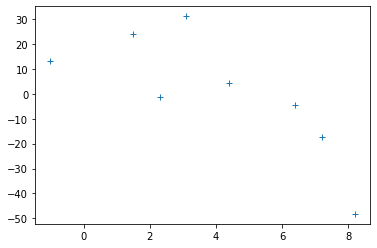

In [5]:
plt.plot(x, y, "+")
plt.show()

In [6]:
def to_fixedpoint_field(x):
    curve_order = 21888242871839275222246405745257275088548364400416034343698204186575808495617
    t = int(x * 2**16)
    if t < 0:
        t = t + curve_order
    return t

In [7]:
x_fp = list(map(to_fixedpoint_field, x))
y_fp = list(map(to_fixedpoint_field, y))

In [8]:
snarky_commandline = "snarky_cli prove linear_regression.zk " + " ".join(map(str, x_fp)) + " " + " ".join(map(str, y_fp))

In [9]:
snarky_commandline

'snarky_cli prove linear_regression.zk 21888242871839275222246405745257275088548364400416034343698204186575808430081 98304 150732 203161 288358 419430 471859 537395 851968 1579417 21888242871839275222246405745257275088548364400416034343698204186575808410421 2038169 288358 21888242871839275222246405745257275088548364400416034343698204186575808207259 21888242871839275222246405745257275088548364400416034343698204186575807368398 21888242871839275222246405745257275088548364400416034343698204186575805336782'

In [10]:
!eval $(opam env) && {snarky_commandline}

dune exec --root .linear_regression.snarky.build ./linear_regression_gen.exe -- prove --proving-key=linear_regression.pk 21888242871839275222246405745257275088548364400416034343698204186575808430081 98304 150732 203161 288358 419430 471859 537395 851968 1579417 21888242871839275222246405745257275088548364400416034343698204186575808410421 2038169 288358 21888242871839275222246405745257275088548364400416034343698204186575808207259 21888242871839275222246405745257275088548364400416034343698204186575807368398 21888242871839275222246405745257275088548364400416034343698204186575805336782
Entering directory '/home/df/local/snarky/snarky-examples/.linear_regression.snarky.build'
Entering directory '/home/df/local/snarky/snarky-examples/.linear_regression.snarky.build'
Division result: 262962
Division result: 12288
Mean of x values: 262962
Mean of y values: 12288
m numerator prered: 21888242871839275222246405745257275088548364400416034343698204184783395091088
m numerator: 2188824287183927522224

In [11]:
r_python = linregress(x, y)

m_python = r_python.slope
b_python = r_python.intercept

r_python = linregress(x, y)
m_python, b_python

(-6.070346733576974, 24.54476626847761)

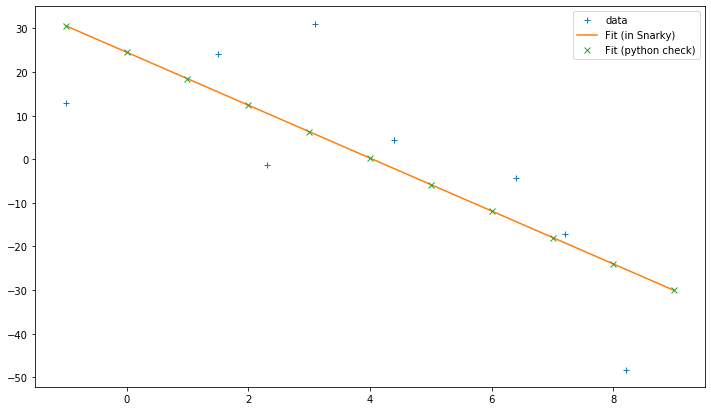

In [12]:


m = -6.07035827637
b = 24.544708252


interpolate_x = list(range(-1,10))
interpolate_y = [m*xi + b for xi in interpolate_x]

interpolate_x_python = list(range(-1, 10))
interpolate_y_python = [m_python*xi + b_python for xi in interpolate_x]

plt.figure(figsize=(12,7))

plt.plot(x, y, "+", label = "data")
plt.plot(interpolate_x, interpolate_y, label = "Fit (in Snarky)")
plt.plot(interpolate_x_python, interpolate_y_python, "x", label = "Fit (python check)")
plt.legend()
plt.show()

In [13]:
snarky_commandline_verifier = "snarky_cli verify linear_regression.zk --proof linear_regression_gen.zkp " + " ".join(map(str, x_fp)) + " " + " ".join(map(str, y_fp))

In [14]:
!eval $(opam env) && {snarky_commandline_verifier}

dune exec --root .linear_regression.snarky.build ./linear_regression_gen.exe -- verify linear_regression_gen.zkp --verification-key=linear_regression.vk 21888242871839275222246405745257275088548364400416034343698204186575808430081 98304 150732 203161 288358 419430 471859 537395 851968 1579417 21888242871839275222246405745257275088548364400416034343698204186575808410421 2038169 288358 21888242871839275222246405745257275088548364400416034343698204186575808207259 21888242871839275222246405745257275088548364400416034343698204186575807368398 21888242871839275222246405745257275088548364400416034343698204186575805336782
Entering directory '/home/df/local/snarky/snarky-examples/.linear_regression.snarky.build'
Entering directory '/home/df/local/snarky/snarky-examples/.linear_regression.snarky.build'
Proof is valid.
